<a href="https://colab.research.google.com/github/stavco9/datastreaming-final-project/blob/main/deezymatch_generator/deezymatch_train/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install DeezyMatch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 798.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 M

/usr/local/lib/python3.10/dist-packages/DeezyMatch/rnn_networks.py:30: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [13]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from DeezyMatch import train as dm_train, plot_log, finetune as dm_finetune, inference as dm_inference

In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/IDC_MSc/Year1/DataStreamingAlgorithms/DeezyMatchDataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IDC_MSc/Year1/DataStreamingAlgorithms/DeezyMatchDataset


In [ ]:
columns = ['test_word', 'true_word', 'is_correct']
df = pd.read_csv('../create_topmatching_dataset/wikigaz_en_topmatching.txt',sep='\t', names=columns)

In [ ]:
df.head(5)

,test_word,true_word,is_correct
0,Bentley Priory,McCredie Township,False
1,Bentley Priory,Bentley Priory,True
2,Westfield Heritage Centre,Cardiff School of Engineering,False
3,Westfield Heritage Centre,Westfield Heritage Centre,True
4,Southgate Estate,Black Rock Rail Yard,False


In [ ]:
TRAIN_PERC = 70
VALID_PERC = 15
TEST_PERC = 15

In [ ]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

In [ ]:
df.head(5)

,test_word,true_word,is_correct
134041,WJZY,WJZY,True
149977,Marburn Academy,Marburn Academy,True
269627,New Coundon,New Coundon,True
23272,Garden Theater,Limbury Cum Biscot,False
123644,Windgather Rocks,Fork Union Academy,False


In [ ]:
train_count = int(len(df) * TRAIN_PERC / 100)
valid_count = train_count + int(len(df) * VALID_PERC / 100)
df_train = df.iloc[:train_count,:]
df_valid = df.iloc[train_count:valid_count,:]
df_test = df.iloc[valid_count:,:]

In [ ]:
df_train.to_csv('wikigaz_train_set.txt', sep='\t', index=False, header=False)
df_valid.to_csv('wikigaz_valid_set.txt', sep='\t', index=False, header=False)
df_test.to_csv('wikigaz_test_set.txt', sep='\t', index=False, header=False)

In [8]:
# train a new model
dm_train(input_file_path="./train_conf.yaml",
         dataset_path="./wikigaz_train_set.txt",
         model_name="wikigaz_en_model")

2024-03-22 16:07:29 874eb355de2f [INFO] read input file: ./train_conf.yaml
2024-03-22 16:07:30 874eb355de2f [INFO] pytorch will use: cuda
2024-03-22 16:07:30 874eb355de2f [INFO] read CSV file: ./wikigaz_train_set.txt
2024-03-22 16:07:34 874eb355de2f [INFO] number of labels, True: 112356 and False: 112015
2024-03-22 16:07:34 874eb355de2f [INFO] Splitting the Dataset
2024-03-22 16:07:34 874eb355de2f [INFO] finish splitting the Dataset. User time: 0.15710091590881348
2024-03-22 16:07:34 874eb355de2f [INFO] splits are as follow:
train    157059
test      33657
val       33655
Name: split, dtype: int64
2024-03-22 16:07:34 874eb355de2f [INFO] start creating a lookup table and convert characters to indices
2024-03-22 16:07:36 874eb355de2f [INFO] -- create vocabulary
2024-03-22 16:07:52 874eb355de2f [INFO] -- convert tokens to indices
2024-03-22 16:07:52 874eb355de2f [INFO] -- create a lookup table for tokens
2024-03-22 16:07:52 874eb355de2f [INFO] -- read list of characters from ./characters_




2024-03-22 16:08:01 874eb355de2f [INFO] ******************************
2024-03-22 16:08:01 874eb355de2f [INFO] **** (Bi-directional) GRU ****
2024-03-22 16:08:01 874eb355de2f [INFO] ******************************
2024-03-22 16:08:01 874eb355de2f [INFO] read inputs
2024-03-22 16:08:01 874eb355de2f [INFO] create a two_parallel_rnns model
2024-03-22 16:08:03 874eb355de2f [INFO] start fitting parameters
2024-03-22 16:08:03 874eb355de2f [INFO] Number of batches: 614
2024-03-22 16:08:03 874eb355de2f [INFO] Number of epochs: 5


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/614 [00:00<?, ?it/s]




Total number of params: 1584183

two_parallel_rnns (
  (emb): Embedding(23491, 60), weights=((23491, 60),), parameters=1409460
  (rnn_1): GRU(60, 60, num_layers=2, dropout=0.01, bidirectional=True), weights=((180, 60), (180, 60), (180,), (180,), (180, 60), (180, 60), (180,), (180,), (180, 120), (180, 60), (180,), (180,), (180, 120), (180, 60), (180,), (180,)), parameters=109440
  (attn_step1): Linear(in_features=120, out_features=60, bias=True), weights=((60, 120), (60,)), parameters=7260
  (attn_step2): Linear(in_features=60, out_features=1, bias=True), weights=((1, 60), (1,)), parameters=61
  (fc1): Linear(in_features=480, out_features=120, bias=True), weights=((120, 480), (120,)), parameters=57720
  (fc2): Linear(in_features=120, out_features=2, bias=True), weights=((2, 120), (2,)), parameters=242
)


2024-03-22 16:08:42 874eb355de2f [INFO] 03/22/2024_16:08:42 -- Epoch: 1/5; Train; loss: 0.156; acc: 0.942; precision: 0.934, recall: 0.952, macrof1: 0.942, weightedf1: 0.942


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:08:47 874eb355de2f [INFO] 03/22/2024_16:08:47 -- Epoch: 1/5; Valid; loss: 0.097; acc: 0.966; precision: 0.966, recall: 0.967, macrof1: 0.966, weightedf1: 0.966
2024-03-22 16:08:47 874eb355de2f [INFO] saving the model


  0%|          | 0/614 [00:00<?, ?it/s]

2024-03-22 16:09:23 874eb355de2f [INFO] 03/22/2024_16:09:23 -- Epoch: 2/5; Train; loss: 0.083; acc: 0.971; precision: 0.971, recall: 0.971, macrof1: 0.971, weightedf1: 0.971


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:09:28 874eb355de2f [INFO] 03/22/2024_16:09:28 -- Epoch: 2/5; Valid; loss: 0.088; acc: 0.970; precision: 0.974, recall: 0.966, macrof1: 0.970, weightedf1: 0.970
2024-03-22 16:09:28 874eb355de2f [INFO] saving the model


  0%|          | 0/614 [00:00<?, ?it/s]

2024-03-22 16:10:05 874eb355de2f [INFO] 03/22/2024_16:10:05 -- Epoch: 3/5; Train; loss: 0.067; acc: 0.977; precision: 0.977, recall: 0.976, macrof1: 0.977, weightedf1: 0.977


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:10:10 874eb355de2f [INFO] 03/22/2024_16:10:10 -- Epoch: 3/5; Valid; loss: 0.088; acc: 0.969; precision: 0.966, recall: 0.971, macrof1: 0.969, weightedf1: 0.969
2024-03-22 16:10:10 874eb355de2f [INFO] saving the model


  0%|          | 0/614 [00:00<?, ?it/s]

2024-03-22 16:10:46 874eb355de2f [INFO] 03/22/2024_16:10:46 -- Epoch: 4/5; Train; loss: 0.052; acc: 0.982; precision: 0.983, recall: 0.981, macrof1: 0.982, weightedf1: 0.982


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:10:51 874eb355de2f [INFO] 03/22/2024_16:10:51 -- Epoch: 4/5; Valid; loss: 0.089; acc: 0.967; precision: 0.962, recall: 0.972, macrof1: 0.967, weightedf1: 0.967
2024-03-22 16:10:51 874eb355de2f [INFO] saving the model


  0%|          | 0/614 [00:00<?, ?it/s]

2024-03-22 16:11:27 874eb355de2f [INFO] 03/22/2024_16:11:27 -- Epoch: 5/5; Train; loss: 0.039; acc: 0.986; precision: 0.987, recall: 0.985, macrof1: 0.986, weightedf1: 0.986


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:11:32 874eb355de2f [INFO] 03/22/2024_16:11:32 -- Epoch: 5/5; Valid; loss: 0.098; acc: 0.970; precision: 0.973, recall: 0.966, macrof1: 0.970, weightedf1: 0.970
2024-03-22 16:11:32 874eb355de2f [INFO] saving the model
2024-03-22 16:11:32 874eb355de2f [INFO] saving the model with least valid loss (checkpoint: 2) at ./models/wikigaz_en_model/wikigaz_en_model.model



User time: 211.1901


output_name: wikigaz_en_model
Time: 165s
output_name: wikigaz_en_model
Time / epoch: 41.250s
Epoch: 2, Loss: 0.088
Epoch: 2, macro F1: 0.97
Epoch: 2, Acc: 0.97
Epoch: 2, Prec/Recall: 0.974/0.966


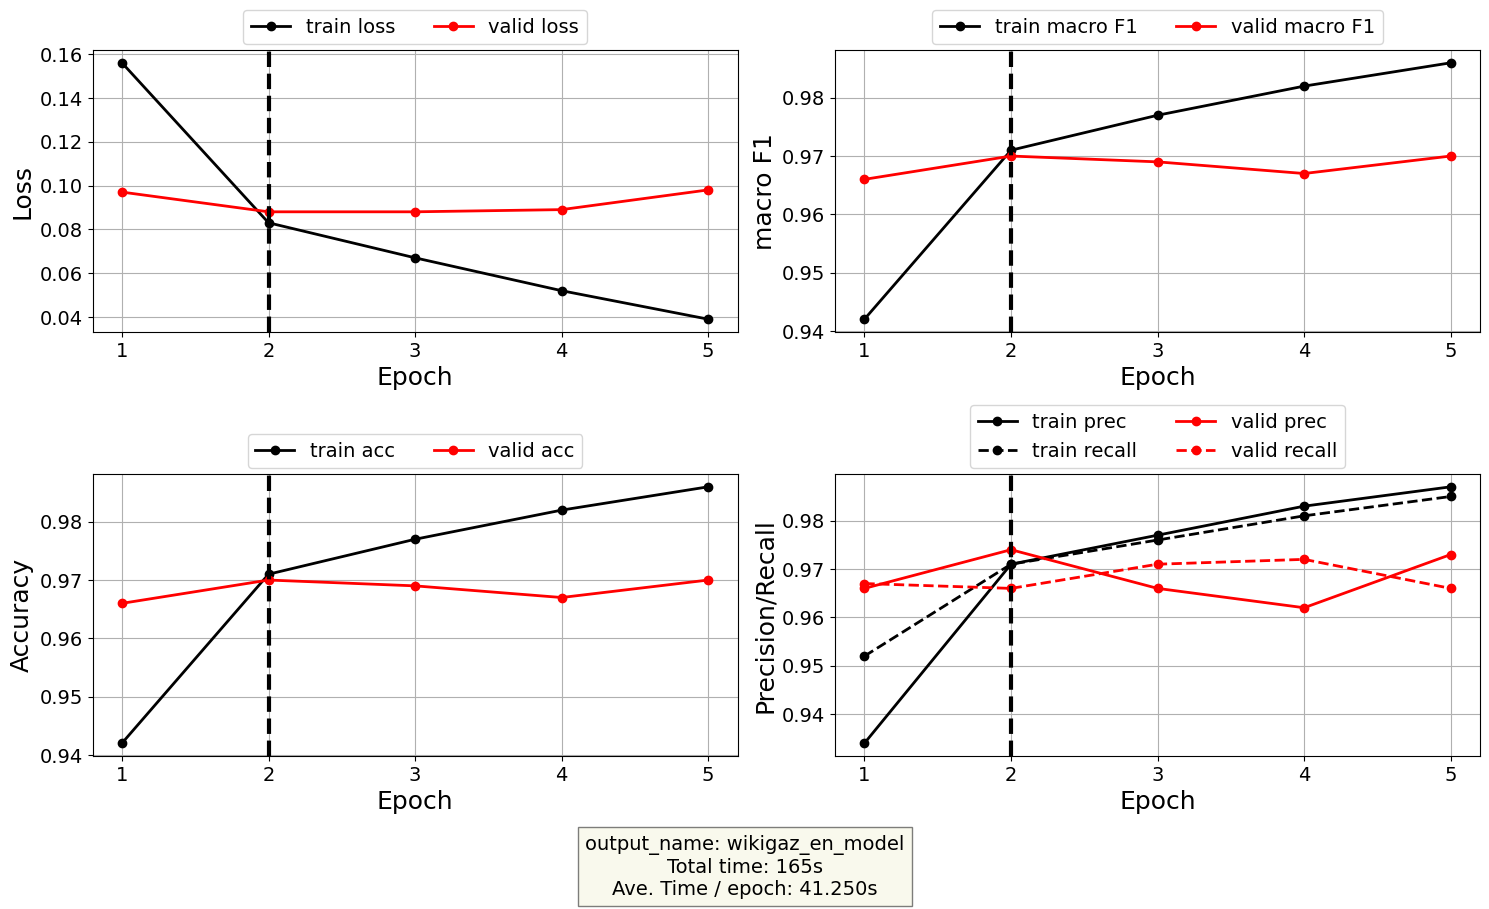

In [10]:
# plot log file
plot_log(path2log="./models/wikigaz_en_model/log.txt",
         output_name="wikigaz_en_model")

In [12]:
# fine-tune a pretrained model stored at pretrained_model_path and pretrained_vocab_path
dm_finetune(input_file_path="./train_conf.yaml",
            dataset_path="./wikigaz_valid_set.txt",
            model_name="wikigaz_en_model",
            pretrained_model_path="./models/wikigaz_en_model/wikigaz_en_model.model",
            pretrained_vocab_path="./models/wikigaz_en_model/wikigaz_en_model.vocab")

2024-03-22 16:16:03 874eb355de2f [INFO] read input file: ./train_conf.yaml
2024-03-22 16:16:03 874eb355de2f [INFO] pytorch will use: cuda
2024-03-22 16:16:03 874eb355de2f [INFO] read CSV file: ./wikigaz_valid_set.txt
2024-03-22 16:16:04 874eb355de2f [INFO] number of labels, True: 24090 and False: 23989
2024-03-22 16:16:04 874eb355de2f [INFO] Splitting the Dataset
2024-03-22 16:16:04 874eb355de2f [INFO] finish splitting the Dataset. User time: 0.03247261047363281
2024-03-22 16:16:04 874eb355de2f [INFO] splits are as follow:
train    33655
test      7213
val       7211
Name: split, dtype: int64
2024-03-22 16:16:04 874eb355de2f [INFO] start creating a lookup table and convert characters to indices
2024-03-22 16:16:05 874eb355de2f [INFO] -- create vocabulary
2024-03-22 16:16:08 874eb355de2f [INFO] -- convert tokens to indices
2024-03-22 16:16:10 874eb355de2f [INFO] skipping 0 lines




List all parameters in the model
emb.weight False
rnn_1.weight_ih_l0 False
rnn_1.weight_hh_l0 False
rnn_1.bias_ih_l0 False
rnn_1.bias_hh_l0 False
rnn_1.weight_ih_l0_reverse False
rnn_1.weight_hh_l0_reverse False
rnn_1.bias_ih_l0_reverse False
rnn_1.bias_hh_l0_reverse False
rnn_1.weight_ih_l1 False
rnn_1.weight_hh_l1 False
rnn_1.bias_ih_l1 False
rnn_1.bias_hh_l1 False
rnn_1.weight_ih_l1_reverse False
rnn_1.weight_hh_l1_reverse False
rnn_1.bias_ih_l1_reverse False
rnn_1.bias_hh_l1_reverse False
attn_step1.weight False
attn_step1.bias False
attn_step2.weight False
attn_step2.bias False
fc1.weight True
fc1.bias True
fc2.weight True
fc2.bias True



2024-03-22 16:16:10 874eb355de2f [INFO] ******************************
2024-03-22 16:16:10 874eb355de2f [INFO] **** (Bi-directional) GRU ****
2024-03-22 16:16:10 874eb355de2f [INFO] ******************************
2024-03-22 16:16:10 874eb355de2f [INFO] Number of batches: 132
2024-03-22 16:16:10 874eb355de2f [INFO] Number of epochs: 5


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]




Total number of params: 1584183

two_parallel_rnns (
  (emb): Embedding(23491, 60), weights=((23491, 60),), parameters=1409460
  (rnn_1): GRU(60, 60, num_layers=2, dropout=0.01, bidirectional=True), weights=((180, 60), (180, 60), (180,), (180,), (180, 60), (180, 60), (180,), (180,), (180, 120), (180, 60), (180,), (180,), (180, 120), (180, 60), (180,), (180,)), parameters=109440
  (attn_step1): Linear(in_features=120, out_features=60, bias=True), weights=((60, 120), (60,)), parameters=7260
  (attn_step2): Linear(in_features=60, out_features=1, bias=True), weights=((1, 60), (1,)), parameters=61
  (fc1): Linear(in_features=480, out_features=120, bias=True), weights=((120, 480), (120,)), parameters=57720
  (fc2): Linear(in_features=120, out_features=2, bias=True), weights=((2, 120), (2,)), parameters=242
)


2024-03-22 16:16:16 874eb355de2f [INFO] 03/22/2024_16:16:16 -- Epoch: 1/5; Train; loss: 0.088; acc: 0.969; precision: 0.968, recall: 0.970, macrof1: 0.969, weightedf1: 0.969


  0%|          | 0/29 [00:00<?, ?it/s]

2024-03-22 16:16:17 874eb355de2f [INFO] 03/22/2024_16:16:17 -- Epoch: 1/5; Valid; loss: 0.078; acc: 0.972; precision: 0.970, recall: 0.974, macrof1: 0.972, weightedf1: 0.972
2024-03-22 16:16:17 874eb355de2f [INFO] saving the model


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:16:23 874eb355de2f [INFO] 03/22/2024_16:16:23 -- Epoch: 2/5; Train; loss: 0.080; acc: 0.972; precision: 0.971, recall: 0.973, macrof1: 0.972, weightedf1: 0.972


  0%|          | 0/29 [00:00<?, ?it/s]

2024-03-22 16:16:24 874eb355de2f [INFO] 03/22/2024_16:16:24 -- Epoch: 2/5; Valid; loss: 0.080; acc: 0.971; precision: 0.969, recall: 0.973, macrof1: 0.971, weightedf1: 0.971
2024-03-22 16:16:24 874eb355de2f [INFO] saving the model


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:16:30 874eb355de2f [INFO] 03/22/2024_16:16:30 -- Epoch: 3/5; Train; loss: 0.077; acc: 0.973; precision: 0.972, recall: 0.973, macrof1: 0.973, weightedf1: 0.973


  0%|          | 0/29 [00:00<?, ?it/s]

2024-03-22 16:16:31 874eb355de2f [INFO] 03/22/2024_16:16:31 -- Epoch: 3/5; Valid; loss: 0.079; acc: 0.973; precision: 0.972, recall: 0.975, macrof1: 0.973, weightedf1: 0.973
2024-03-22 16:16:31 874eb355de2f [INFO] saving the model


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:16:37 874eb355de2f [INFO] 03/22/2024_16:16:37 -- Epoch: 4/5; Train; loss: 0.073; acc: 0.974; precision: 0.974, recall: 0.974, macrof1: 0.974, weightedf1: 0.974


  0%|          | 0/29 [00:00<?, ?it/s]

2024-03-22 16:16:38 874eb355de2f [INFO] 03/22/2024_16:16:38 -- Epoch: 4/5; Valid; loss: 0.084; acc: 0.969; precision: 0.962, recall: 0.978, macrof1: 0.969, weightedf1: 0.969
2024-03-22 16:16:38 874eb355de2f [INFO] saving the model


  0%|          | 0/132 [00:00<?, ?it/s]

2024-03-22 16:16:44 874eb355de2f [INFO] 03/22/2024_16:16:44 -- Epoch: 5/5; Train; loss: 0.071; acc: 0.975; precision: 0.974, recall: 0.975, macrof1: 0.975, weightedf1: 0.975


  0%|          | 0/29 [00:00<?, ?it/s]

2024-03-22 16:16:45 874eb355de2f [INFO] 03/22/2024_16:16:45 -- Epoch: 5/5; Valid; loss: 0.079; acc: 0.973; precision: 0.971, recall: 0.975, macrof1: 0.973, weightedf1: 0.973
2024-03-22 16:16:45 874eb355de2f [INFO] saving the model
2024-03-22 16:16:45 874eb355de2f [INFO] saving the model with least valid loss (checkpoint: 1) at ./models/wikigaz_en_model/wikigaz_en_model.model



User time: 34.8630


In [14]:
# model inference using a model stored at pretrained_model_path and pretrained_vocab_path
dm_inference(input_file_path="./train_conf.yaml",
             dataset_path="./wikigaz_test_set.txt",
             pretrained_model_path="./models/wikigaz_en_model/wikigaz_en_model.model",
             pretrained_vocab_path="./models/wikigaz_en_model/wikigaz_en_model.vocab")

2024-03-22 16:20:58 874eb355de2f [INFO] read input file: ./train_conf.yaml
2024-03-22 16:20:59 874eb355de2f [INFO] pytorch will use: cuda
2024-03-22 16:20:59 874eb355de2f [INFO] read CSV file: ./wikigaz_test_set.txt
2024-03-22 16:21:00 874eb355de2f [INFO] number of labels, True: 23819 and False: 24261
2024-03-22 16:21:03 874eb355de2f [INFO] skipping 0 lines


  0%|          | 0/188 [00:00<?, ?it/s]

2024-03-22 16:21:12 874eb355de2f [INFO] 03/22/2024_16:21:12 -- Epoch: 0/0; Test; loss: 0.083; acc: 0.971; precision: 0.972, recall: 0.971, macrof1: 0.971, weightedf1: 0.971
--- 13.61948013305664 seconds ---
